In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np # used for arrays

import gymnasium as gym # pull the environment

import time # to get the time

import math # needed for calculations

import matplotlib.pyplot as plt

In [3]:
env = gym.make("CartPole-v1")
print(env.action_space.n)

2


In [4]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 80000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]

epsilon = 1

epsilon_decay_value = 0.99995

In [5]:
bins = [np.linspace(-4.8, 4.8, 30),
        np.linspace(-3, 3, 30),
        np.linspace(-.418, .418, 50),
        np.linspace(-4, 4, 50)]

In [6]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [7]:
def get_discrete_state(state, bins, obsSpaceSize):
    stateIndex = []
    for i in range(obsSpaceSize):
        stateIndex.append(np.digitize(state[i], bins[i]) - 1) # -1 will turn bin into index
    return tuple(stateIndex)

In [8]:
Reward_tracker=[]
Episode_tracker=[]
Time_tracker=[]
T0= time.time()
for episode in range(EPISODES + 1): #go through the episodes
    t0 = time.time() #set the initial time
    discrete_state = get_discrete_state(env.reset()[0],bins,len(env.observation_space.high)) #get the discrete start for the restarted environment 
    done1 = False
    done2 = False
    episode_reward = 0 #reward starts as 0 for each episode
    

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not (done1 or done2): 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) #take cordinated action
        else:

            action = np.random.randint(0, env.action_space.n) #do a random ation

        new_state, reward, done1,done2, info = env.step(action) #step action to get new states, reward, and the "done" status.

        episode_reward += reward #add the reward

        new_discrete_state = get_discrete_state(new_state,bins,len(env.observation_space.high))

#         if episode % 2000 == 0: #render
#             env.render()

        if not (done1 or done2): #update q-table
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: #epsilon modification
        if episode_reward > prior_reward:
            epsilon = math.pow(epsilon_decay_value, episode*1.2)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() #episode has finished
    episode_total = t1 - t0 #episode total time
    total = total + episode_total
    

    total_reward += episode_reward #episode total reward
    prior_reward = episode_reward

    if episode % 1000 == 0: #every 1000 episodes print the average time and the average reward
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0
        Reward_tracker.append(mean_reward)
        Episode_tracker.append(episode)
        T1= time.time()
        Time_tracker.append((T1-T0)/60)
        

env.close()


Episode: 0
Epsilon: 1.0
Time Average: 6.613492965698242e-06
Mean Reward: 0.032
Time Average: 0.0018105430603027343
Mean Reward: 23.112
Epsilon: 0.9139291288598366
Episode: 2000
Epsilon: 0.8869177758711552
Time Average: 0.0019290375709533692
Mean Reward: 24.939
Epsilon: 0.8607047486686201
Epsilon: 0.8352664525784996
Time Average: 0.002065859317779541
Mean Reward: 26.172
Epsilon: 0.8105799902722285
Episode: 4000
Epsilon: 0.7866231411562365
Time Average: 0.0021997914314270017
Mean Reward: 28.62
Epsilon: 0.7408126643807126
Time Average: 0.0024726812839508056
Mean Reward: 32.028
Episode: 6000
Time Average: 0.002745072364807129
Mean Reward: 35.49
Time Average: 0.003117645740509033
Mean Reward: 40.556
Epsilon: 0.6376209781063321
Episode: 8000
Time Average: 0.0034504051208496095
Mean Reward: 44.822
Epsilon: 0.6004879222872617
Epsilon: 0.5827403850634769
Time Average: 0.0038314244747161864
Mean Reward: 49.522
Episode: 10000
Time Average: 0.00413336181640625
Mean Reward: 53.978
Time Average: 0.0

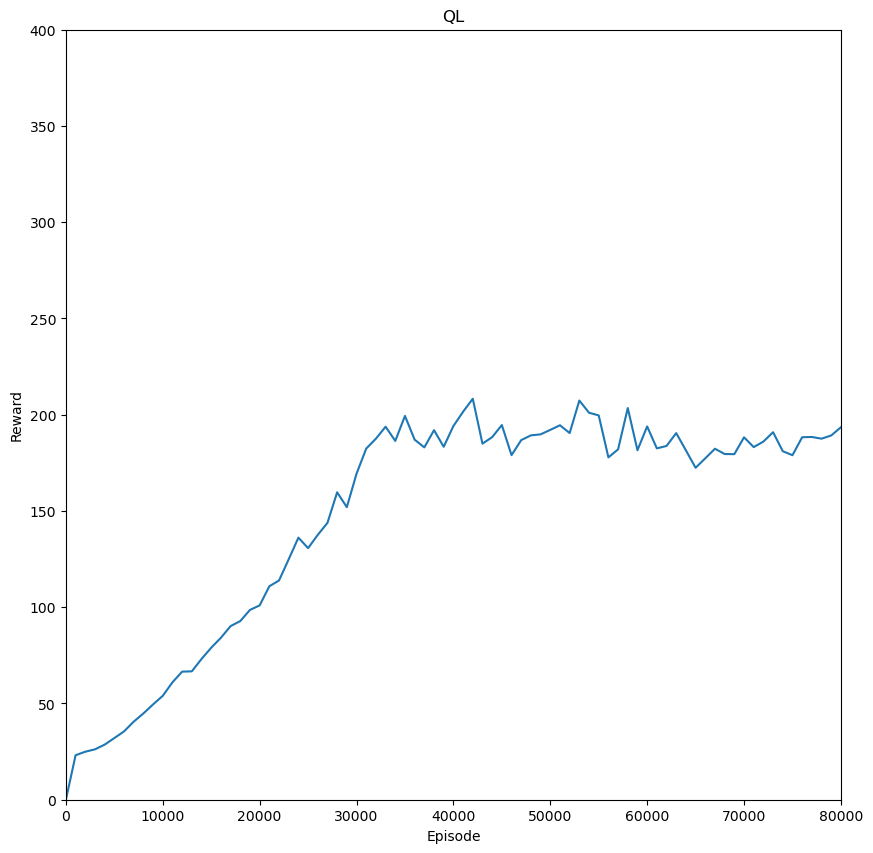

In [9]:
plt.figure(figsize=(10,10))
plt.plot(Episode_tracker,Reward_tracker)
plt.title("QL")
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.ylim(0,400)
plt.xlim(0,80000)
plt.show()

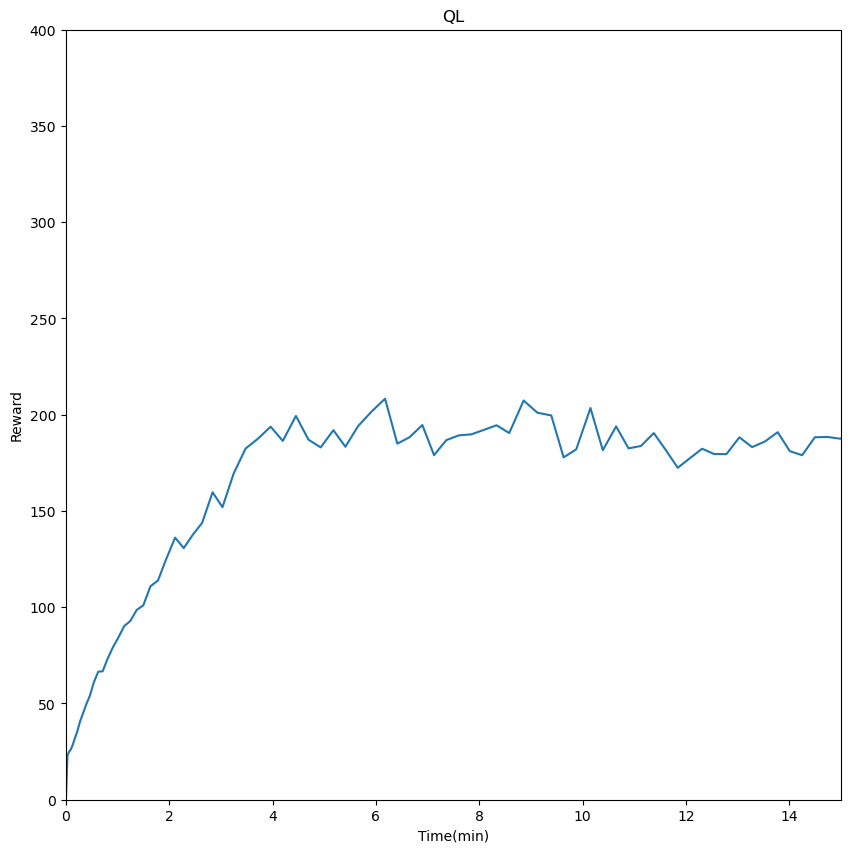

In [10]:
plt.figure(figsize=(10,10))
plt.plot(Time_tracker,Reward_tracker)
plt.title("QL")
plt.xlabel('Time(min)')
plt.ylabel('Reward')
plt.ylim(0,400)
plt.xlim(0,15)
plt.show()

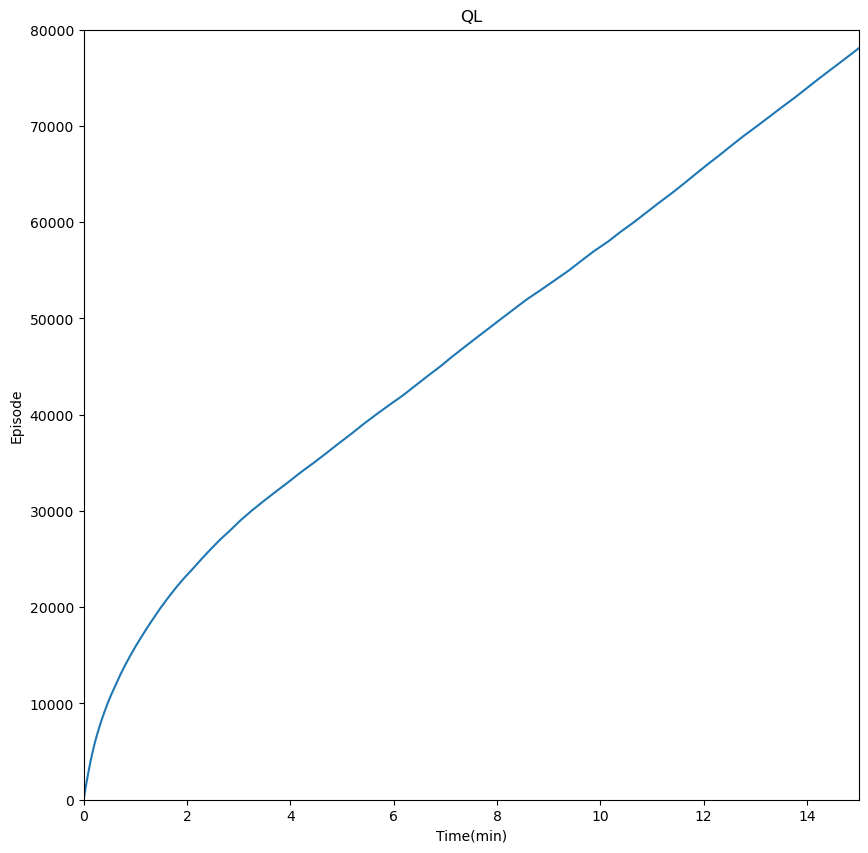

In [11]:
plt.figure(figsize=(10,10))
plt.plot(Time_tracker,Episode_tracker)
plt.title("QL")
plt.xlabel('Time(min)')
plt.ylabel('Episode')
plt.ylim(0,80000)
plt.xlim(0,15)
plt.show()